## Crisis Management using Sentimental Analysis from Twitter: Effects of Ukraine War on the Kenyan Economy

# Background
On February 24th, 2022, Russia invaded Ukraine after months of military preparation around the borders. Putin insists on calling it a "special military operation" and punishes anyone who calls it a "war" or defies the Russian state's completely false and fabricated narrative, which claims that Russian military is saving ethnic Russians and Ukrainians from "Nazi" officials in Ukraine.

As a result, some developing countries were affected in a number of ways and besides different measures were picked other countries, such as ties, and sanctions being cut out and all, food export and oil export became a shortage, and most countries turned to reversors that could aid them survive. 

In geopolitics, Russia is almost cerntainly going to be more isolated, which is pushing it to harden its alliance with China, which in turn is navigating with care as to not violate the sanctions imposed on Russia. Countries that have not been part of NATO, like Finland and Sweden, are now more eager to join the alliance agianst by the Russian aggression. As such, we are witnessing a fundamentally changing world due to Russia's invasion of Ukraine. In Kenya, grain shortage, and food prices became a determining factor. 

# Goals
For Research purposes, this project is analysing response rate on crisis, since am analysing the progression of tweets based on the effects of a certain crisis that is affecting them. The project therefore aims to conduct an NLP task to help the public keep track of the changes affecting a certain area as compared to their country. 
1. Scraping of the data from Twitter
2. EDA 
3. Text Prepocessing 
4. Sentiment Analysis 
5. Word Cloud 
6. Modelling

# Libraries Needed

In [1]:
#pip install Textblob

In [2]:
#pip install wordcloud

In [3]:
#pip install vaderSentimen

In [4]:
#pip install nltk


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm.notebook import tqdm
import snscrape.modules.twitter as snstwitter

import nltk

# downloading stopwords corpus

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string 
import re 
import textblob
from textblob import TextBlob

import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

lemmatizer = WordNetLemmatizer ()

from PIL import Image
import warnings
%matplotlib inline

# Pulling and Extract Tweet Data

In [6]:
#scraper = snstwitter.TwitterSearchScraper("#Nofuel")

#tweets = []
#n_tweets = 10000

#for i, tweet in tqdm(enumerate(scraper.get_items()), total=n_tweets):
   #data = [
   #tweet.date,
   #tweet.id,
   #tweet.sourceLabel,
   #tweet.rawContent,
   #tweet.user.username,
   #tweet.user.location,
   #tweet.user.verified,
   #tweet.likeCount,
   #tweet.retweetCount,
   #tweet.place
   #]
   #tweets.append(data)
    
   #if i >= n_tweets: break

In [7]:
#df1 = pd.DataFrame(tweets, columns=['Date', 'ID', 'Source', 'Content', 'Username','Location', 'Verified', 'Likes', 'Retweets', 'Place'])
# tweet_df

#df1.to_csv("Fuel.csv", index=False)

# Read and perform EDA

In [8]:
df = pd.read_csv("Ukrainewar.csv")
df.head()

Date            ID               Source  \
0  2023-02-22 07:10:16+00:00  1.628290e+18  Twitter for Android   
1  2023-02-22 07:08:47+00:00  1.628290e+18  Twitter for Android   
2  2023-02-22 07:07:27+00:00  1.628290e+18      Twitter Web App   
3  2023-02-22 07:07:25+00:00  1.628290e+18      Twitter Web App   
4  2023-02-22 07:07:00+00:00  1.628290e+18   Twitter for iPhone   

                                             Content         Username  \
0             #ZelenskyWarCriminal #RussiaUkraineWar  manuel_moschini   
1  #Russia 🇷🇺 / #Ukraine 🇺🇦\n\n‼️Air raid sirens ...           _Nex3_   
2  নিষেধাজ্ঞার অধীনে থাকা জাহাজ প্রত্যাখ্যান, বাং...    tbsnewsdotnet   
3  West media are not talking about President #Pu...   segunajayiemma   
4  #Russia #Ukraine #RussiaUkraineWar President D...        FalcDanny   

            Location  Verified  Likes  Retweets Place  
0   Florence, Italy.     False      0         0   NaN  
1             Italia     False      0         0   NaN  
2  Dhaka, Bangladesh     False      0         0   NaN  
3      Lagos,Nigeria     False      1         0   NaN  
4                NaN     False      0         0   NaN

In [9]:
del df['ID']

In [10]:
del df['Place']

In [11]:
df1 = pd.read_csv("Food.csv")
df1.head()

Date            ID               Source  \
0  2023-02-22 05:09:32+00:00  1.630000e+18  Twitter for Android   
1  2023-02-21 19:53:24+00:00  1.630000e+18  Twitter for Android   
2  2023-02-21 17:50:00+00:00  1.630000e+18  Twitter for Android   
3  2023-02-21 12:35:38+00:00  1.630000e+18  Twitter for Android   
4  2023-02-21 09:25:25+00:00  1.630000e+18  Twitter for Android   

                                             Content         Username  \
0  #lowerfoodprices \n\nSome people are eating bl...         OleNucho   
1  Now you understand that #LowerFoodPrices was a...  This_is_Kibande   
2         @omwambaKE I support this #lowerfoodprices      TracyspiceB   
3  Skyrocketing #HighCostOfLiving is a PUSH FACTO...       BazengaaKE   
4  @OleItumbi last year a time like this you were...    alphoncetiffz   

            Location  Verified  Likes  Retweets Place  
0                254     False      0         0   NaN  
1      Kisumu, Kenya     False      1         0   NaN  
2                NaN     False      0         0   NaN  
3  Nairobi, Majengo.     False      7         3   NaN  
4     Mombasa, Kenya     False      0         0   NaN

In [12]:
del df1['ID']

In [13]:
del df1 ['Place']

In [14]:
df2 = pd.read_csv("Fuel.csv")
df2.head()

Date            ID               Source  \
0  2023-02-21 21:01:50+00:00  1.630000e+18   Twitter for iPhone   
1  2023-02-19 06:25:07+00:00  1.630000e+18  Twitter for Android   
2  2023-02-17 19:44:34+00:00  1.630000e+18   Twitter for iPhone   
3  2023-02-17 08:49:07+00:00  1.630000e+18   Twitter for iPhone   
4  2023-02-16 10:34:51+00:00  1.630000e+18  Twitter for Android   

                                             Content        Username  \
0  In the land of #nofuel, &amp; c\ntime of #noca...   Oba_Temitope1   
1  This time next week, we'll have a President-el...        Dr_GbeTV   
2  This Human is about to realize that feelings i...   smokejumper61   
3  God should send @D_DeGea to Nigeria 🇳🇬 to save...    agarnacho7__   
4  Only February in this country 😂\n#nocash \n#no...  Daniel21760619   

                 Location  Verified  Likes  Retweets Place  
0                     NaN     False      0         0   NaN  
1          Abuja, Nigeria     False      2         1   NaN  
2        Washington State     False      0         0   NaN  
3  Manchester, England UK     False      3         0   NaN  
4                     NaN     False      0         0   NaN

In [15]:
del df2['ID']

In [16]:
del df2['Place']

# Merge Datasets

In [17]:
data = pd.merge(df, df1, how='outer')

In [18]:
ddf = pd.merge(data, df2, how='outer')

In [19]:
ddf.head()

Date               Source  \
0  2023-02-22 07:10:16+00:00  Twitter for Android   
1  2023-02-22 07:08:47+00:00  Twitter for Android   
2  2023-02-22 07:07:27+00:00      Twitter Web App   
3  2023-02-22 07:07:25+00:00      Twitter Web App   
4  2023-02-22 07:07:00+00:00   Twitter for iPhone   

                                             Content         Username  \
0             #ZelenskyWarCriminal #RussiaUkraineWar  manuel_moschini   
1  #Russia 🇷🇺 / #Ukraine 🇺🇦\n\n‼️Air raid sirens ...           _Nex3_   
2  নিষেধাজ্ঞার অধীনে থাকা জাহাজ প্রত্যাখ্যান, বাং...    tbsnewsdotnet   
3  West media are not talking about President #Pu...   segunajayiemma   
4  #Russia #Ukraine #RussiaUkraineWar President D...        FalcDanny   

            Location  Verified  Likes  Retweets  
0   Florence, Italy.     False      0         0  
1             Italia     False      0         0  
2  Dhaka, Bangladesh     False      0         0  
3      Lagos,Nigeria     False      1         0  
4                NaN     False      0         0

Preprocessing and Data Wrangling

In [20]:
ddf.shape

(27885, 8)

In [21]:
ddf.dtypes

Date        object
Source      object
Content     object
Username    object
Location    object
Verified      bool
Likes        int64
Retweets     int64
dtype: object

In [22]:
ddf.describe()

Likes      Retweets
count  27885.000000  27885.000000
mean       5.562955      1.646154
std       49.155888     16.029197
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        2.000000      1.000000
max     3222.000000   1661.000000

Removing Duplicates

In [155]:
ddf.drop_duplicates(inplace=True)  # remove duplicate

Preprocessing: The date columns preesents both the date and the time frame, we remove the time part

In [24]:

# slicing the date , and removing the time portion

ddf['Date'] = df.Date.str.slice(0, 10)
print(df["Date"].unique())


['2023-02-22 07:10:16+00:00' '2023-02-22 07:08:47+00:00'
 '2023-02-22 07:07:27+00:00' ... '2023-02-05 10:27:12+00:00'
 '2023-02-05 10:25:07+00:00' '2023-02-05 10:20:09+00:00']


Language check and removing non -english language

In [25]:
#pip install langdetect

In [26]:
from langdetect import detect_langs
from langdetect import detect
from langdetect import lang_detect_exception
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [27]:
# checking how many unique language
# tweets are present in the dataset
def detect_my(text):
    try:
        return detect(text)
    except:
        return 'Unknown'

In [28]:
ddf['language'] = ddf ['Content'].apply(detect_my)

In [29]:
ddf.head()

Date               Source  \
0  2023-02-22  Twitter for Android   
1  2023-02-22  Twitter for Android   
2  2023-02-22      Twitter Web App   
3  2023-02-22      Twitter Web App   
4  2023-02-22   Twitter for iPhone   

                                             Content         Username  \
0             #ZelenskyWarCriminal #RussiaUkraineWar  manuel_moschini   
1  #Russia 🇷🇺 / #Ukraine 🇺🇦\n\n‼️Air raid sirens ...           _Nex3_   
2  নিষেধাজ্ঞার অধীনে থাকা জাহাজ প্রত্যাখ্যান, বাং...    tbsnewsdotnet   
3  West media are not talking about President #Pu...   segunajayiemma   
4  #Russia #Ukraine #RussiaUkraineWar President D...        FalcDanny   

            Location  Verified  Likes  Retweets language  
0   Florence, Italy.     False      0         0       fi  
1             Italia     False      0         0       en  
2  Dhaka, Bangladesh     False      0         0       bn  
3      Lagos,Nigeria     False      1         0       en  
4                NaN     False      0         0       en

In [30]:
print(ddf['language'].unique())

['fi' 'en' 'bn' 'id' 'hr' 'hi' 'vi' 'lt' 'af' 'es' 'fr' 'de' 'kn' 'ar'
 'gu' 'no' 'ru' 'ja' 'ca' 'pt' 'it' 'et' 'tr' 'pl' 'sv' 'bg' 'uk' 'hu'
 'el' 'te' 'mr' 'cs' 'ro' 'ta' 'ur' 'sq' 'nl' 'pa' 'ml' 'fa' 'ko' 'ne'
 'sl' 'zh-cn' 'sw' 'he' 'sk' 'th' 'so' 'da' 'tl' 'Unknown' 'cy' 'lv']


In [31]:

# before removing the non-english  tweets

print(ddf.shape)
 
# removing all the tweets expect the
# non-english tweets

ddf = ddf[ddf['language'] == 'en']

print("After removing non-english Tweets")
 
# only the number of english tweets

print(ddf.shape) 

(27885, 9)
After removing non-english Tweets
(22879, 9)


# Text Prepocessing 
Removing RT, Punctutions and others 

In [32]:
# Removing RT, Punctuation etc
def remove_rt(x): return re.sub('RT @\w+: ', " ", x)
 
def rt(x): return re.sub(

    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)
 
ddf["Content"] = ddf.Content.map(remove_rt).map(rt)

ddf["Content"] = ddf.Content.str.lower()

In [33]:
ddf.head()

Date                        Source  \
1  2023-02-22           Twitter for Android   
3  2023-02-22               Twitter Web App   
4  2023-02-22            Twitter for iPhone   
5  2023-02-22           Twitter for Android   
8  2023-02-22  intellinews site integration   

                                             Content        Username  \
1   russia       ukraine       air raid sirens ac...          _Nex3_   
3  west media are not talking about president  pu...  segunajayiemma   
4   russia  ukraine  russiaukrainewar president d...       FalcDanny   
5  the briefing in the security meeting chaired b...  Mohammad445555   
8  russia s budget deficit widens as oil prices f...  bneintellinews   

          Location  Verified  Likes  Retweets language  
1           Italia     False      0         0       en  
3    Lagos,Nigeria     False      1         0       en  
4              NaN     False      0         0       en  
5         Pakistan     False      0         0       en  
8  London - Europe     False      0         0       en

Sentimental Analysis

In [49]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Getrude\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
#Calculating Negative, Positive, Neutral and Compound values

ddf[['polarity', 'subjectivity']] = ddf['Content'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in ddf['Content'].iteritems():
    score = SIA().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        ddf.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        ddf.loc[index, 'sentiment'] = "positive"
    else:
        ddf.loc[index, 'sentiment'] = "neutral"
    ddf.loc[index, 'neg'] = neg
    ddf.loc[index, 'neu'] = neu
    ddf.loc[index, 'pos'] = pos
    ddf.loc[index, 'compound'] = comp

ddf.head(10)

Date                        Source  \
1   2023-02-22           Twitter for Android   
3   2023-02-22               Twitter Web App   
4   2023-02-22            Twitter for iPhone   
5   2023-02-22           Twitter for Android   
8   2023-02-22  intellinews site integration   
10  2023-02-22               Twitter Web App   
12  2023-02-22               Twitter Web App   
13  2023-02-22               Twitter Web App   
14  2023-02-22           Twitter for Android   
15  2023-02-22               Twitter Web App   

                                              Content        Username  \
1   air raid siren active takeoff awac 50u 31ks be...          _Nex3_   
3   medium talk stand same sex marriage ban just w...  segunajayiemma   
4                settle war day trumpisalaughingstock       FalcDanny   
5   briefing security meeting chair insufficient s...  Mohammad445555   
8   budget deficit widen oil price fall military s...  bneintellinews   
10                   russiaukrainewar chinaspyballoon   austin5brandt   
12  provide ukraine long range guide bomb kit s ca...  planetarychess   
13  want take wef love uniparty warmonger ask face...        GMontaco   
14  handed just jdam aerial bomb modification incr...   ukraine_world   
15  civilian kill wound russian shelling market pu...        Stmnnews   

           Location  Verified  Likes  Retweets language  text_len  \
1            Italia     False      0         0       en       182   
3     Lagos,Nigeria     False      1         0       en       188   
4               NaN     False      0         0       en       115   
5          Pakistan     False      0         0       en       276   
8   London - Europe     False      0         0       en       167   
10       Texas USA      False      0         0       en        41   
12              NaN     False      0         0       en       181   
13              NaN     False      0         0       en       283   
14          Ukraine      True     66         5       en       142   
15            India     False      0         0       en       216   

    text_word_count  polarity  subjectivity sentiment    neg    neu    pos  \
1                25 -0.133333      0.600000  positive  0.000  0.787  0.213   
3                27  0.400000      0.262500  positive  0.196  0.598  0.207   
4                14  0.000000      0.000000  negative  0.565  0.435  0.000   
5                28  0.800000      0.900000  positive  0.000  0.536  0.464   
8                21 -0.100000      0.100000  negative  0.153  0.847  0.000   
10                2  0.000000      0.000000   neutral  0.000  1.000  0.000   
12               27  0.075000      0.400000  negative  0.170  0.691  0.138   
13               45 -0.025000      0.366667  negative  0.355  0.472  0.173   
14               22  0.000000      0.000000  negative  0.221  0.621  0.159   
15               34 -0.025000      0.041667  negative  0.365  0.635  0.000   

    compound  
1     0.4019  
3     0.0516  
4    -0.5994  
5     0.7783  
8    -0.4019  
10    0.0000  
12   -0.1531  
13   -0.7783  
14   -0.2263  
15   -0.7845

In [110]:
conditions = [
    (ddf['compound'] <= -0.5),
    (ddf['compound'] > -0.5) & (ddf['compound'] < 0.5),
    (ddf['compound'] > 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['neg', 'neu', 'pos']

# create a new column and use np.select to assign values to it using our lists as arguments
ddf['Category'] = np.select(conditions, values)
ddf.head()

Date                        Source  \
1  2023-02-22           Twitter for Android   
3  2023-02-22               Twitter Web App   
4  2023-02-22            Twitter for iPhone   
5  2023-02-22           Twitter for Android   
8  2023-02-22  intellinews site integration   

                                             Content        Username  \
1  air raid siren active takeoff awac 50u 31ks be...          _Nex3_   
3  medium talk stand same sex marriage ban just w...  segunajayiemma   
4               settle war day trumpisalaughingstock       FalcDanny   
5  briefing security meeting chair insufficient s...  Mohammad445555   
8  budget deficit widen oil price fall military s...  bneintellinews   

          Location  Verified  Likes  Retweets language  text_len  \
1           Italia     False      0         0       en       182   
3    Lagos,Nigeria     False      1         0       en       188   
4              NaN     False      0         0       en       115   
5         Pakistan     False      0         0       en       276   
8  London - Europe     False      0         0       en       167   

   text_word_count  polarity  subjectivity sentiment    neg    neu    pos  \
1               25 -0.133333        0.6000  positive  0.000  0.787  0.213   
3               27  0.400000        0.2625  positive  0.196  0.598  0.207   
4               14  0.000000        0.0000  negative  0.565  0.435  0.000   
5               28  0.800000        0.9000  positive  0.000  0.536  0.464   
8               21 -0.100000        0.1000  negative  0.153  0.847  0.000   

   compound Category  
1    0.4019      neu  
3    0.0516      neu  
4   -0.5994      neg  
5    0.7783      pos  
8   -0.4019      neu

In [144]:
ddf.to_csv("ddf_clean.csv") 
ddf=pd.read_csv("ddf_clean.csv")

In [151]:
del ddf['Unnamed: 0']


In [150]:
ddf.head()

Unnamed: 0        Date                        Source  \
0           1  2023-02-22           Twitter for Android   
1           3  2023-02-22               Twitter Web App   
2           4  2023-02-22            Twitter for iPhone   
3           5  2023-02-22           Twitter for Android   
4           8  2023-02-22  intellinews site integration   

                                             Content        Username  \
0  air raid siren active takeoff awac 50u 31ks be...          _Nex3_   
1  medium talk stand same sex marriage ban just w...  segunajayiemma   
2               settle war day trumpisalaughingstock       FalcDanny   
3  briefing security meeting chair insufficient s...  Mohammad445555   
4  budget deficit widen oil price fall military s...  bneintellinews   

          Location  Verified  Likes  Retweets language  text_len  \
0           Italia     False      0         0       en       182   
1    Lagos,Nigeria     False      1         0       en       188   
2              NaN     False      0         0       en       115   
3         Pakistan     False      0         0       en       276   
4  London - Europe     False      0         0       en       167   

   text_word_count  polarity  subjectivity  sentiment    neg    neu    pos  \
0               25 -0.133333        0.6000  -0.133333  0.000  0.787  0.213   
1               27  0.400000        0.2625   0.400000  0.196  0.598  0.207   
2               14  0.000000        0.0000   0.000000  0.565  0.435  0.000   
3               28  0.800000        0.9000   0.800000  0.000  0.536  0.464   
4               21 -0.100000        0.1000  -0.100000  0.153  0.847  0.000   

   compound Category  
0    0.4019      neu  
1    0.0516      neu  
2   -0.5994      neg  
3    0.7783      pos  
4   -0.4019      neu

<AxesSubplot:xlabel='Verified'>

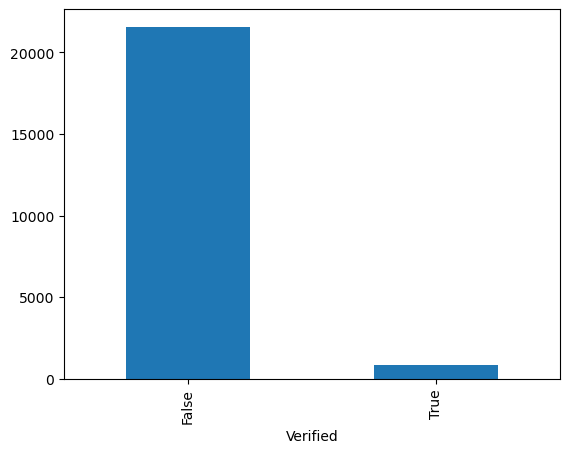

In [165]:
ddf.groupby(ddf.Verified)['Username'].count().plot(kind='bar')

In [52]:
ddf.keys()

Index(['Date', 'Source', 'Content', 'Username', 'Location', 'Verified',
       'Likes', 'Retweets', 'language', 'text_len', 'text_word_count',
       'polarity', 'subjectivity', 'sentiment', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

In [153]:
ddf[["Content","sentiment","polarity", "subjectivity","neg","neu","pos"]].head(5)

Content  sentiment  polarity  \
0  air raid siren active takeoff awac 50u 31ks be...  -0.133333 -0.133333   
1  medium talk stand same sex marriage ban just w...   0.400000  0.400000   
2               settle war day trumpisalaughingstock   0.000000  0.000000   
3  briefing security meeting chair insufficient s...   0.800000  0.800000   
4  budget deficit widen oil price fall military s...  -0.100000 -0.100000   

   subjectivity    neg    neu    pos  
0        0.6000  0.000  0.787  0.213  
1        0.2625  0.196  0.598  0.207  
2        0.0000  0.565  0.435  0.000  
3        0.9000  0.000  0.536  0.464  
4        0.1000  0.153  0.847  0.000

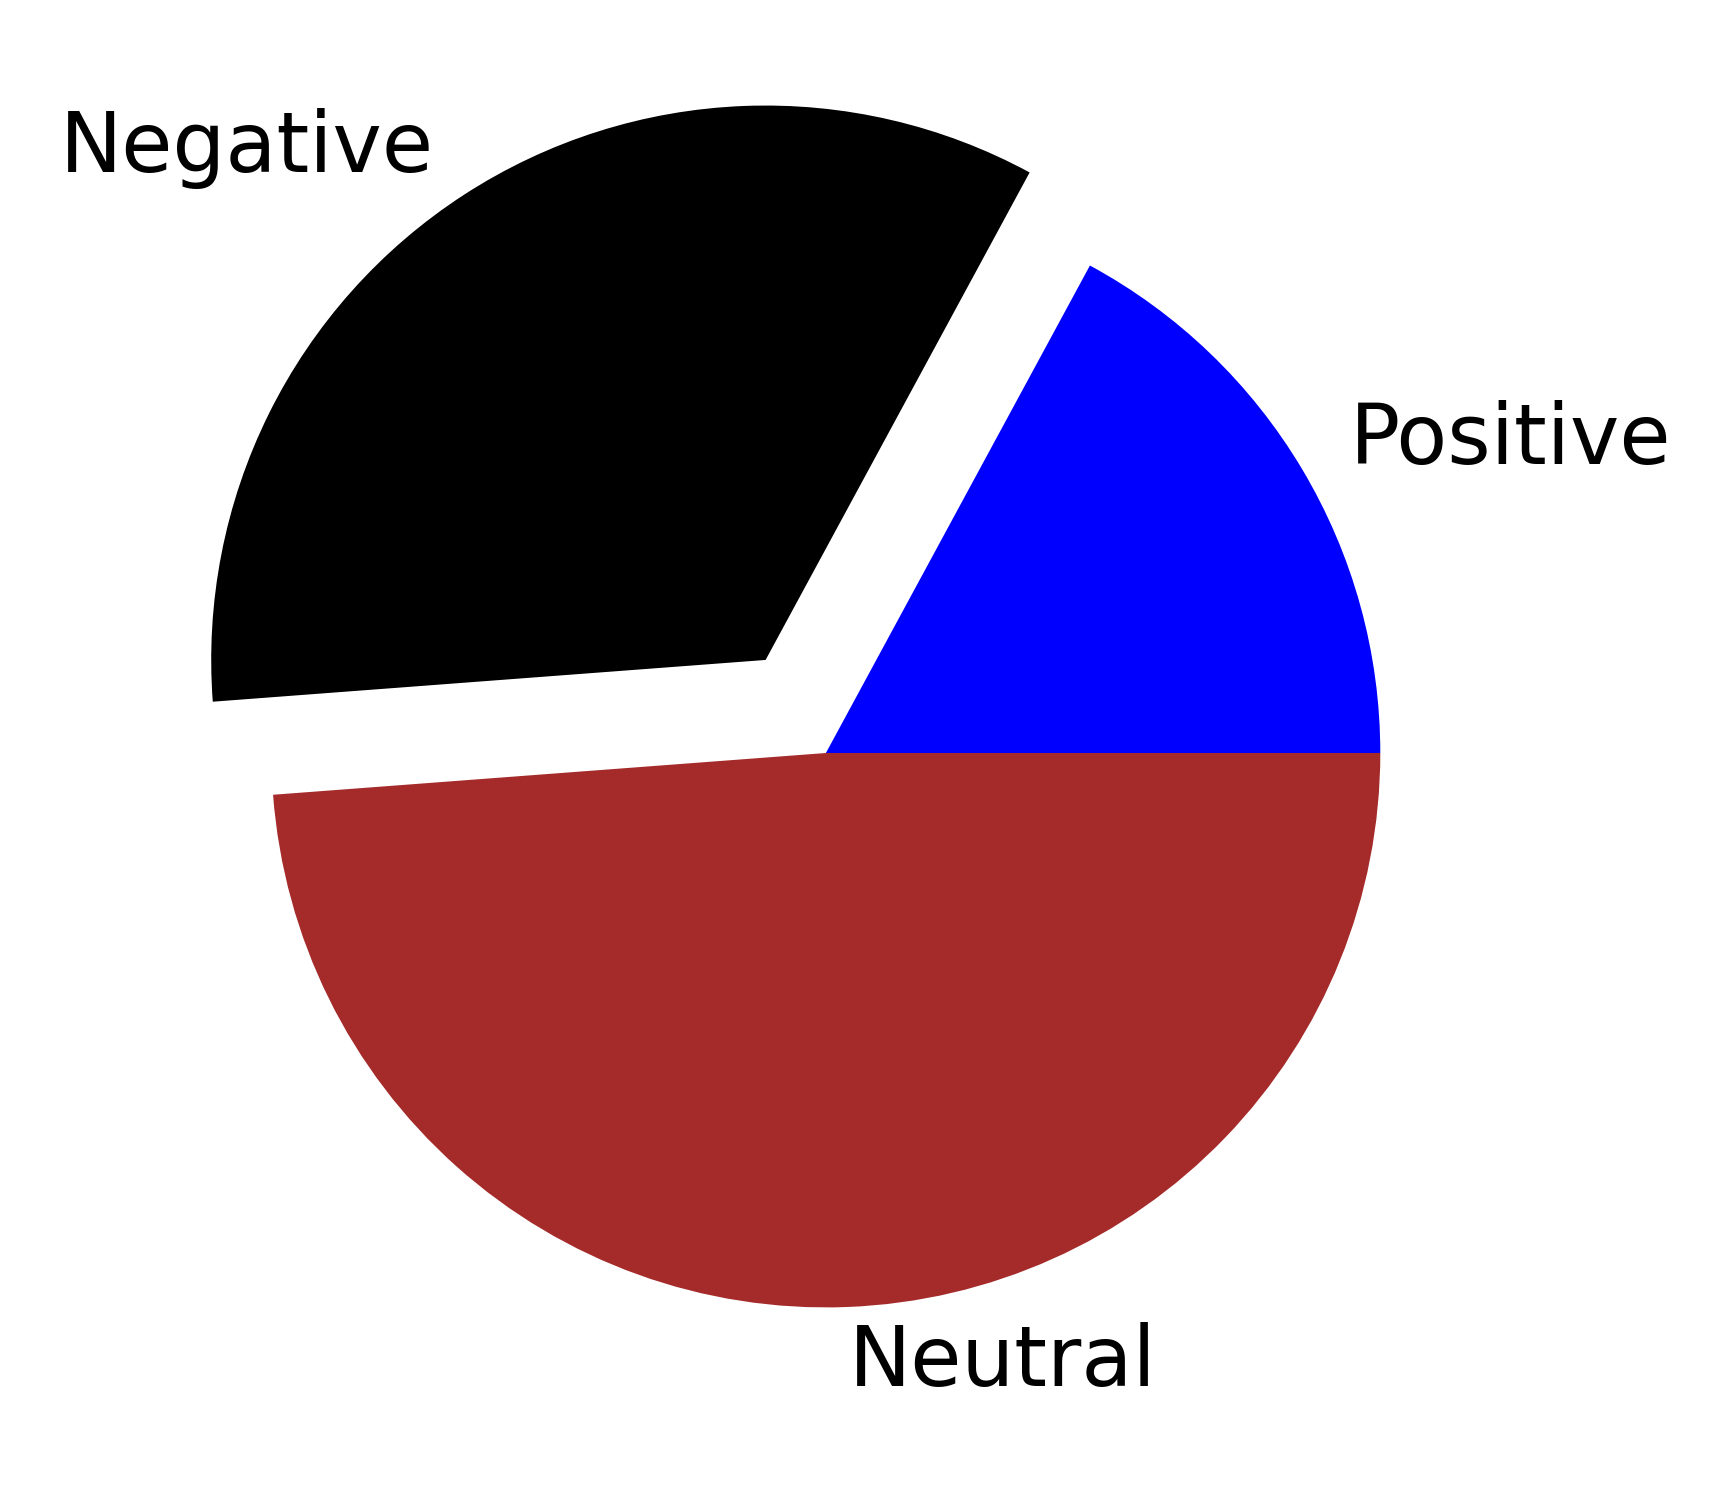

In [154]:
Labels = ["Positive", "Negative", "Neutral"]
mycolors = ["Blue", "Black", "Brown"]

plt.figure(figsize=(5, 3), 
           dpi = 600) # Push new figure on stack
Explode = [0, 0.2, 0]
plt.pie([pos, neg, neu],colors=mycolors,labels=Labels,explode = Explode)
plt.show()


In [37]:
ddf['text_len'] = ddf['Content'].astype(str).apply(len)
ddf['text_word_count'] = ddf['Content'].apply(lambda x: len(str(x).split()))
print("Average length of Content", round(np.mean(ddf['text_len'])))
print("Average word counts of Content", round(np.mean(ddf['text_word_count'])))

Average length of Content 133
Average word counts of Content 19


Feature Extraction 

Find out the most popular words and a group of adjacent words.
Bag of Word model 

In [58]:
list=pd.DataFrame(ddf['Content'])
list

Content
1      air raid siren active takeoff awac 50u 31ks be...
3      medium talk stand same sex marriage ban just w...
4                   settle war day trumpisalaughingstock
5      briefing security meeting chair insufficient s...
8      budget deficit widen oil price fall military s...
...                                                  ...
27878  nomoney nojob nopeace nopresident nohope s har...
27879  nomoney nojob nopeace nopresident nohope s har...
27880  nomoney nojob nopeace nopresident nohope s har...
27881  violence religiouscrisis nigerdelta noelecrici...
27882  s hater lol hahhaaa let know f hater get say s...

[22879 rows x 1 columns]

In [59]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

list['punct'] = list['Content'].apply(lambda x: remove_punct(x))

Tokenization

In [60]:
from nltk.stem import WordNetLemmatizer

In [62]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

list['tokenized'] = list['punct'].apply(lambda x: tokenization(x.lower()))

list

Content  \
1      air raid siren active takeoff awac 50u 31ks be...   
3      medium talk stand same sex marriage ban just w...   
4                   settle war day trumpisalaughingstock   
5      briefing security meeting chair insufficient s...   
8      budget deficit widen oil price fall military s...   
...                                                  ...   
27878  nomoney nojob nopeace nopresident nohope s har...   
27879  nomoney nojob nopeace nopresident nohope s har...   
27880  nomoney nojob nopeace nopresident nohope s har...   
27881  violence religiouscrisis nigerdelta noelecrici...   
27882  s hater lol hahhaaa let know f hater get say s...   

                                                   punct  \
1      air raid siren active takeoff awac u ks belaru...   
3      medium talk stand same sex marriage ban just w...   
4                   settle war day trumpisalaughingstock   
5      briefing security meeting chair insufficient s...   
8      budget deficit widen oil price fall military s...   
...                                                  ...   
27878  nomoney nojob nopeace nopresident nohope s har...   
27879  nomoney nojob nopeace nopresident nohope s har...   
27880  nomoney nojob nopeace nopresident nohope s har...   
27881  violence religiouscrisis nigerdelta noelecrici...   
27882  s hater lol hahhaaa let know f hater get say s...   

                                               tokenized  
1      [air, raid, siren, active, takeoff, awac, u, k...  
3      [medium, talk, stand, same, sex, marriage, ban...  
4              [settle, war, day, trumpisalaughingstock]  
5      [briefing, security, meeting, chair, insuffici...  
8      [budget, deficit, widen, oil, price, fall, mil...  
...                                                  ...  
27878  [nomoney, nojob, nopeace, nopresident, nohope,...  
27879  [nomoney, nojob, nopeace, nopresident, nohope,...  
27880  [nomoney, nojob, nopeace, nopresident, nohope,...  
27881  [violence, religiouscrisis, nigerdelta, noelec...  
27882  [s, hater, lol, hahhaaa, let, know, f, hater, ...  

[22879 rows x 3 columns]

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Getrude\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
#stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
list['nonstop'] = list['tokenized'].apply(lambda x: remove_stopwords(x))

list

Content  \
1      air raid siren active takeoff awac 50u 31ks be...   
3      medium talk stand same sex marriage ban just w...   
4                   settle war day trumpisalaughingstock   
5      briefing security meeting chair insufficient s...   
8      budget deficit widen oil price fall military s...   
...                                                  ...   
27878  nomoney nojob nopeace nopresident nohope s har...   
27879  nomoney nojob nopeace nopresident nohope s har...   
27880  nomoney nojob nopeace nopresident nohope s har...   
27881  violence religiouscrisis nigerdelta noelecrici...   
27882  s hater lol hahhaaa let know f hater get say s...   

                                                   punct  \
1      air raid siren active takeoff awac u ks belaru...   
3      medium talk stand same sex marriage ban just w...   
4                   settle war day trumpisalaughingstock   
5      briefing security meeting chair insufficient s...   
8      budget deficit widen oil price fall military s...   
...                                                  ...   
27878  nomoney nojob nopeace nopresident nohope s har...   
27879  nomoney nojob nopeace nopresident nohope s har...   
27880  nomoney nojob nopeace nopresident nohope s har...   
27881  violence religiouscrisis nigerdelta noelecrici...   
27882  s hater lol hahhaaa let know f hater get say s...   

                                               tokenized  \
1      [air, raid, siren, active, takeoff, awac, u, k...   
3      [medium, talk, stand, same, sex, marriage, ban...   
4              [settle, war, day, trumpisalaughingstock]   
5      [briefing, security, meeting, chair, insuffici...   
8      [budget, deficit, widen, oil, price, fall, mil...   
...                                                  ...   
27878  [nomoney, nojob, nopeace, nopresident, nohope,...   
27879  [nomoney, nojob, nopeace, nopresident, nohope,...   
27880  [nomoney, nojob, nopeace, nopresident, nohope,...   
27881  [violence, religiouscrisis, nigerdelta, noelec...   
27882  [s, hater, lol, hahhaaa, let, know, f, hater, ...   

                                                 nonstop  
1      [air, raid, siren, active, takeoff, awac, u, k...  
3      [medium, talk, stand, sex, marriage, ban, win,...  
4              [settle, war, day, trumpisalaughingstock]  
5      [briefing, security, meeting, chair, insuffici...  
8      [budget, deficit, widen, oil, price, fall, mil...  
...                                                  ...  
27878  [nomoney, nojob, nopeace, nopresident, nohope,...  
27879  [nomoney, nojob, nopeace, nopresident, nohope,...  
27880  [nomoney, nojob, nopeace, nopresident, nohope,...  
27881  [violence, religiouscrisis, nigerdelta, noelec...  
27882  [hater, lol, hahhaaa, let, know, f, hater, get...  

[22879 rows x 4 columns]

In [67]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

list['stemmed'] = list['nonstop'].apply(lambda x: stemming(x))

list

Content  \
1      air raid siren active takeoff awac 50u 31ks be...   
3      medium talk stand same sex marriage ban just w...   
4                   settle war day trumpisalaughingstock   
5      briefing security meeting chair insufficient s...   
8      budget deficit widen oil price fall military s...   
...                                                  ...   
27878  nomoney nojob nopeace nopresident nohope s har...   
27879  nomoney nojob nopeace nopresident nohope s har...   
27880  nomoney nojob nopeace nopresident nohope s har...   
27881  violence religiouscrisis nigerdelta noelecrici...   
27882  s hater lol hahhaaa let know f hater get say s...   

                                                   punct  \
1      air raid siren active takeoff awac u ks belaru...   
3      medium talk stand same sex marriage ban just w...   
4                   settle war day trumpisalaughingstock   
5      briefing security meeting chair insufficient s...   
8      budget deficit widen oil price fall military s...   
...                                                  ...   
27878  nomoney nojob nopeace nopresident nohope s har...   
27879  nomoney nojob nopeace nopresident nohope s har...   
27880  nomoney nojob nopeace nopresident nohope s har...   
27881  violence religiouscrisis nigerdelta noelecrici...   
27882  s hater lol hahhaaa let know f hater get say s...   

                                               tokenized  \
1      [air, raid, siren, active, takeoff, awac, u, k...   
3      [medium, talk, stand, same, sex, marriage, ban...   
4              [settle, war, day, trumpisalaughingstock]   
5      [briefing, security, meeting, chair, insuffici...   
8      [budget, deficit, widen, oil, price, fall, mil...   
...                                                  ...   
27878  [nomoney, nojob, nopeace, nopresident, nohope,...   
27879  [nomoney, nojob, nopeace, nopresident, nohope,...   
27880  [nomoney, nojob, nopeace, nopresident, nohope,...   
27881  [violence, religiouscrisis, nigerdelta, noelec...   
27882  [s, hater, lol, hahhaaa, let, know, f, hater, ...   

                                                 nonstop  \
1      [air, raid, siren, active, takeoff, awac, u, k...   
3      [medium, talk, stand, sex, marriage, ban, win,...   
4              [settle, war, day, trumpisalaughingstock]   
5      [briefing, security, meeting, chair, insuffici...   
8      [budget, deficit, widen, oil, price, fall, mil...   
...                                                  ...   
27878  [nomoney, nojob, nopeace, nopresident, nohope,...   
27879  [nomoney, nojob, nopeace, nopresident, nohope,...   
27880  [nomoney, nojob, nopeace, nopresident, nohope,...   
27881  [violence, religiouscrisis, nigerdelta, noelec...   
27882  [hater, lol, hahhaaa, let, know, f, hater, get...   

                                                 stemmed  
1      [air, raid, siren, activ, takeoff, awac, u, ks...  
3      [medium, talk, stand, sex, marriag, ban, win, ...  
4               [settl, war, day, trumpisalaughingstock]  
5      [brief, secur, meet, chair, insuffici, secur, ...  
8      [budget, deficit, widen, oil, price, fall, mil...  
...                                                  ...  
27878  [nomoney, nojob, nopeac, nopresid, nohop, hard...  
27879  [nomoney, nojob, nopeac, nopresid, nohop, hard...  
27880  [nomoney, nojob, nopeac, nopresid, nohop, hard...  
27881  [violenc, religiouscrisi, nigerdelta, noelecr,...  
27882  [hater, lol, hahhaaa, let, know, f, hater, get...  

[22879 rows x 5 columns]

In [69]:
def clean(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

list.head()

Content  \
1  air raid siren active takeoff awac 50u 31ks be...   
3  medium talk stand same sex marriage ban just w...   
4               settle war day trumpisalaughingstock   
5  briefing security meeting chair insufficient s...   
8  budget deficit widen oil price fall military s...   

                                               punct  \
1  air raid siren active takeoff awac u ks belaru...   
3  medium talk stand same sex marriage ban just w...   
4               settle war day trumpisalaughingstock   
5  briefing security meeting chair insufficient s...   
8  budget deficit widen oil price fall military s...   

                                           tokenized  \
1  [air, raid, siren, active, takeoff, awac, u, k...   
3  [medium, talk, stand, same, sex, marriage, ban...   
4          [settle, war, day, trumpisalaughingstock]   
5  [briefing, security, meeting, chair, insuffici...   
8  [budget, deficit, widen, oil, price, fall, mil...   

                                             nonstop  \
1  [air, raid, siren, active, takeoff, awac, u, k...   
3  [medium, talk, stand, sex, marriage, ban, win,...   
4          [settle, war, day, trumpisalaughingstock]   
5  [briefing, security, meeting, chair, insuffici...   
8  [budget, deficit, widen, oil, price, fall, mil...   

                                             stemmed  
1  [air, raid, siren, activ, takeoff, awac, u, ks...  
3  [medium, talk, stand, sex, marriag, ban, win, ...  
4           [settl, war, day, trumpisalaughingstock]  
5  [brief, secur, meet, chair, insuffici, secur, ...  
8  [budget, deficit, widen, oil, price, fall, mil...

In [70]:
#Appliyng Countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer(analyzer=clean) 
countVector = countVectorizer.fit_transform(list['Content'])

In [185]:
#count_vect = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
#count_vect.head()

In [73]:
count = pd.DataFrame(count_vect.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:15]

0
russiaukrainewar  6067
war               1395
russian           1368
go                1265
ukrainerussiawar  1171
fuel              1115
food              1076
price             1076
ukrain            1043
peopl             1004
kenyan             995
get                929
ukrainewar         926
say                898

Ngram

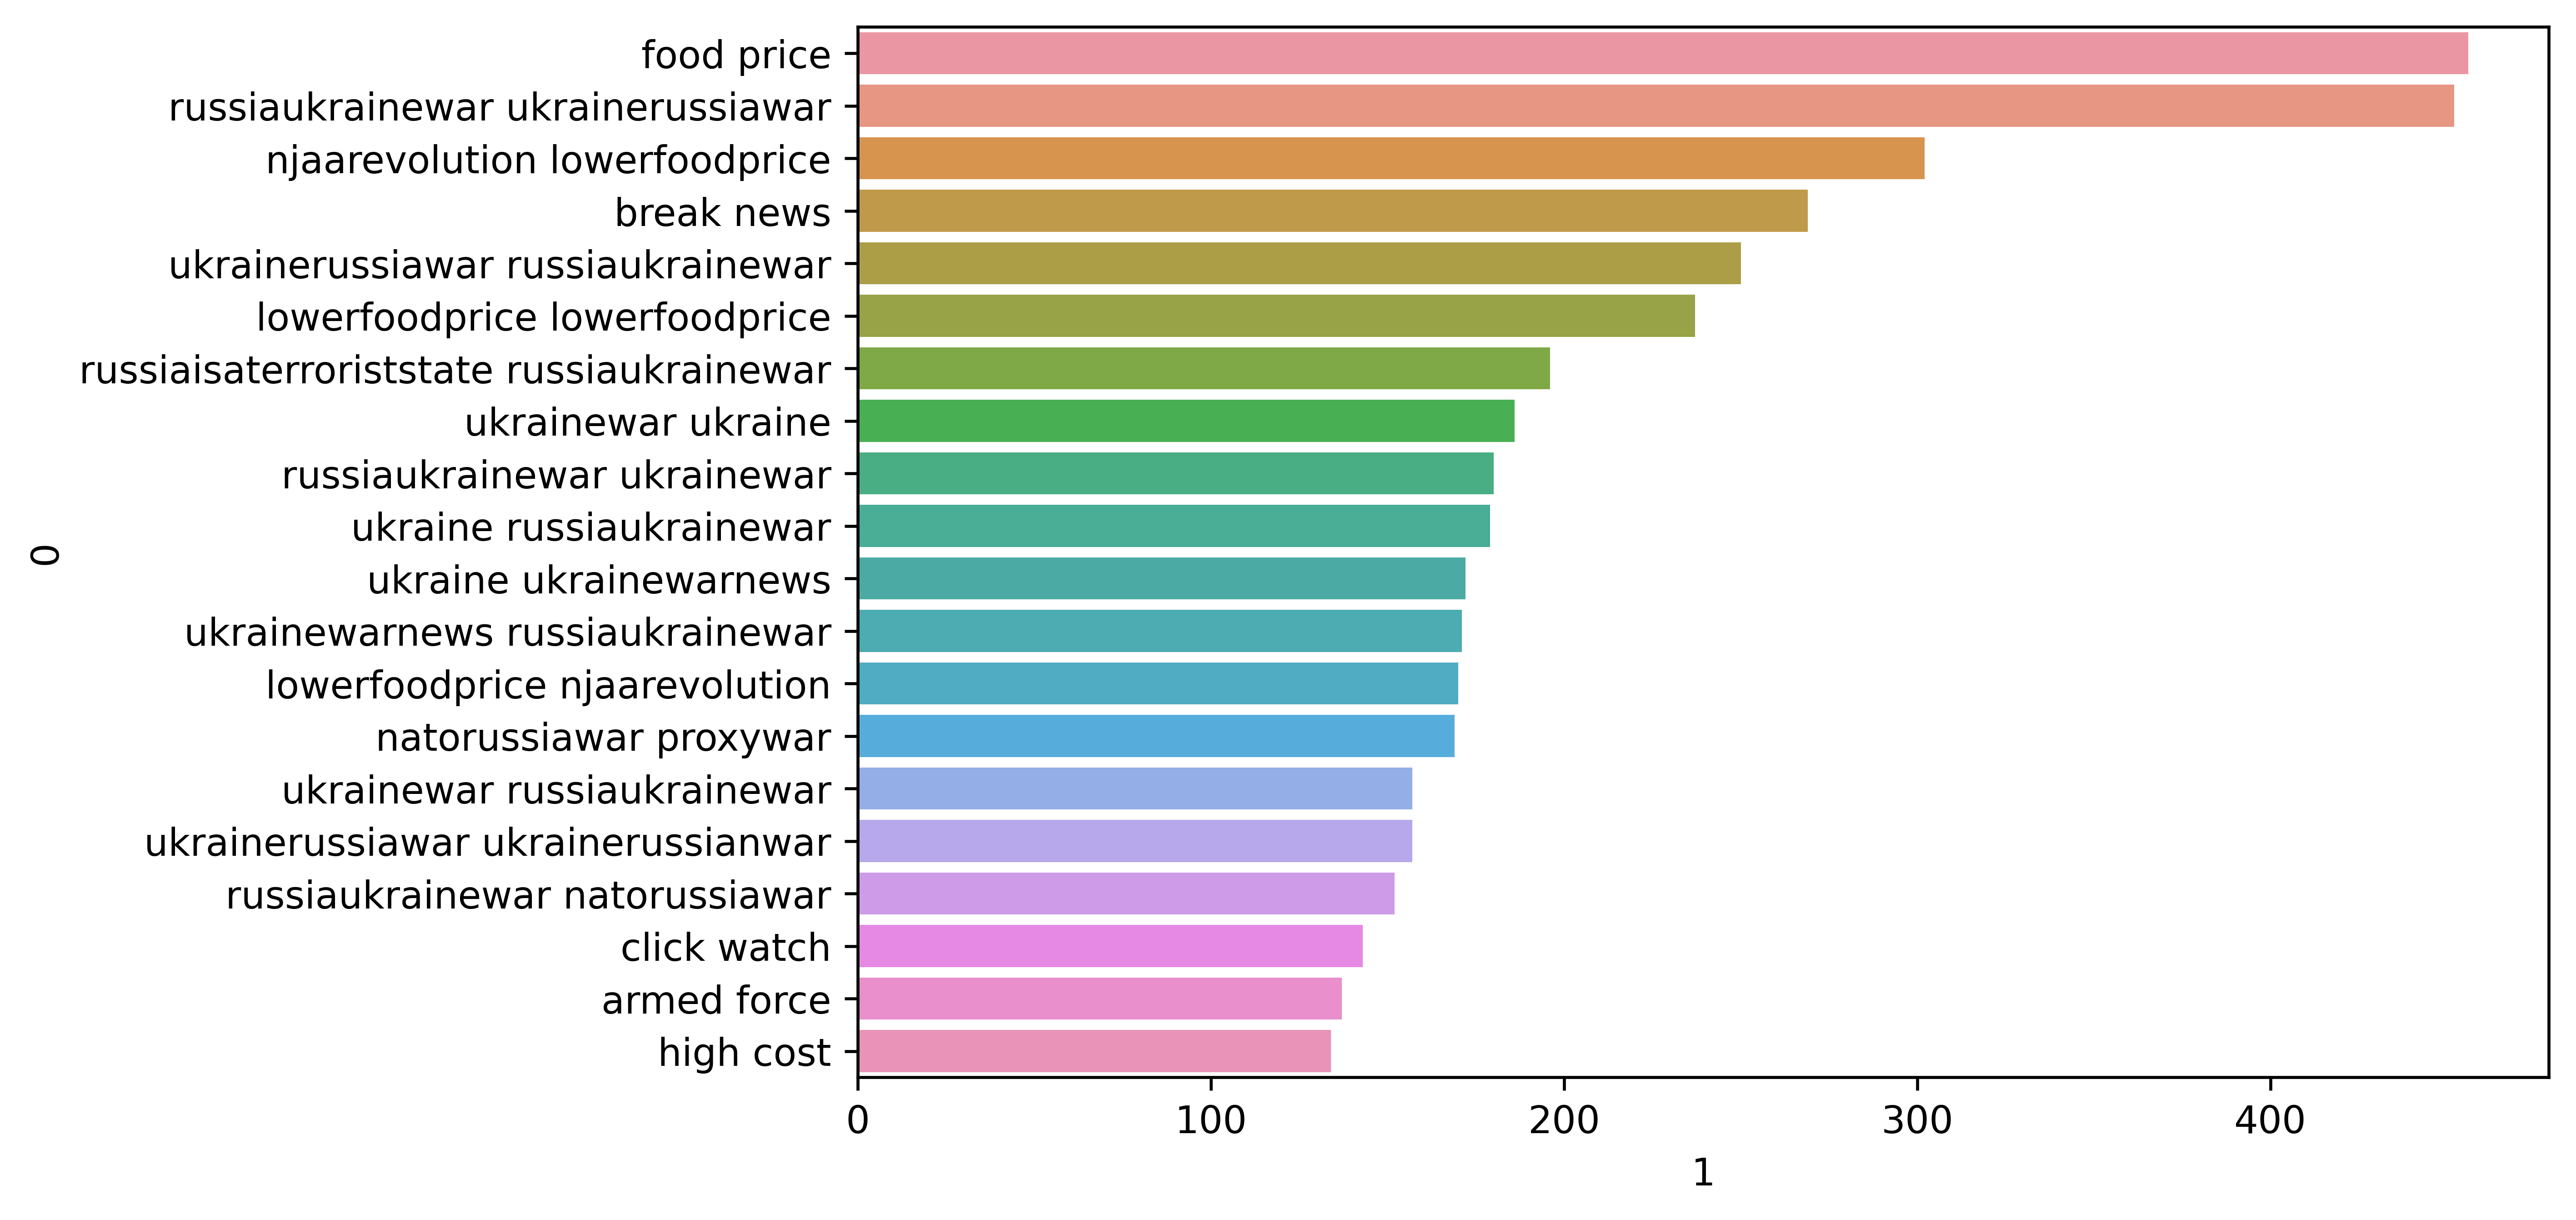

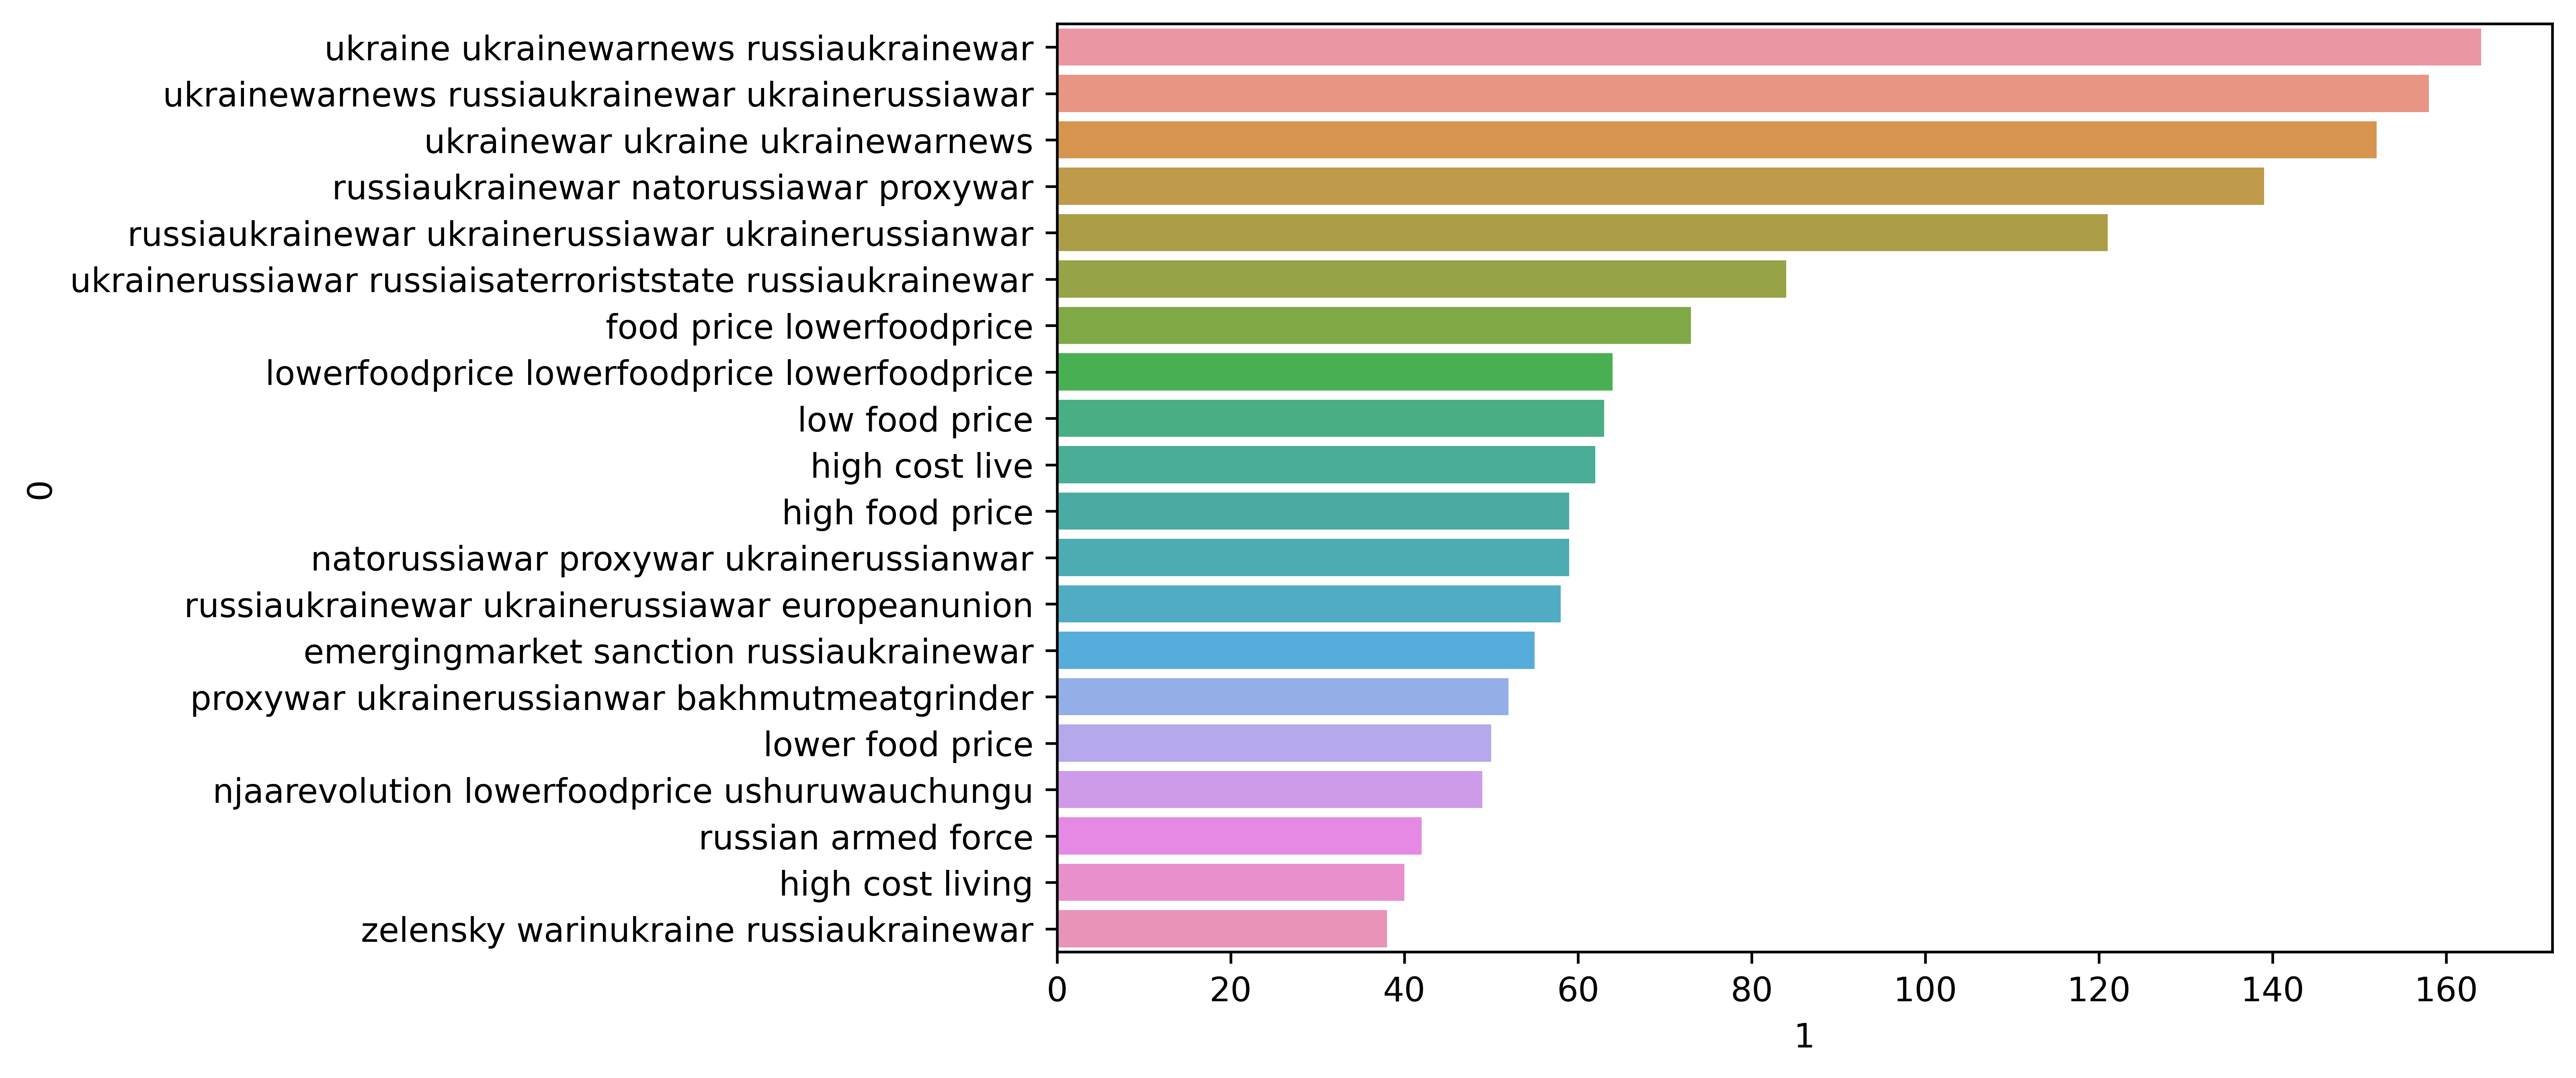

In [82]:
def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range,
                          stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
 
#bigram
bigrams = get_top_n_gram(list['Content'], (2, 2), 20)
plt.figure(figsize=(8, 5),
           dpi=600) 
sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(bigrams))
plt.savefig('bigram.jpg')  # Save that figure
 
#trigram

trigrams = get_top_n_gram(list['Content'], (3, 3), 20)
plt.figure(figsize=(8, 5),
           dpi=600)
sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(trigrams))
plt.savefig('trigram.jpg')  # Save that figure

# StoryTelling and Visualization

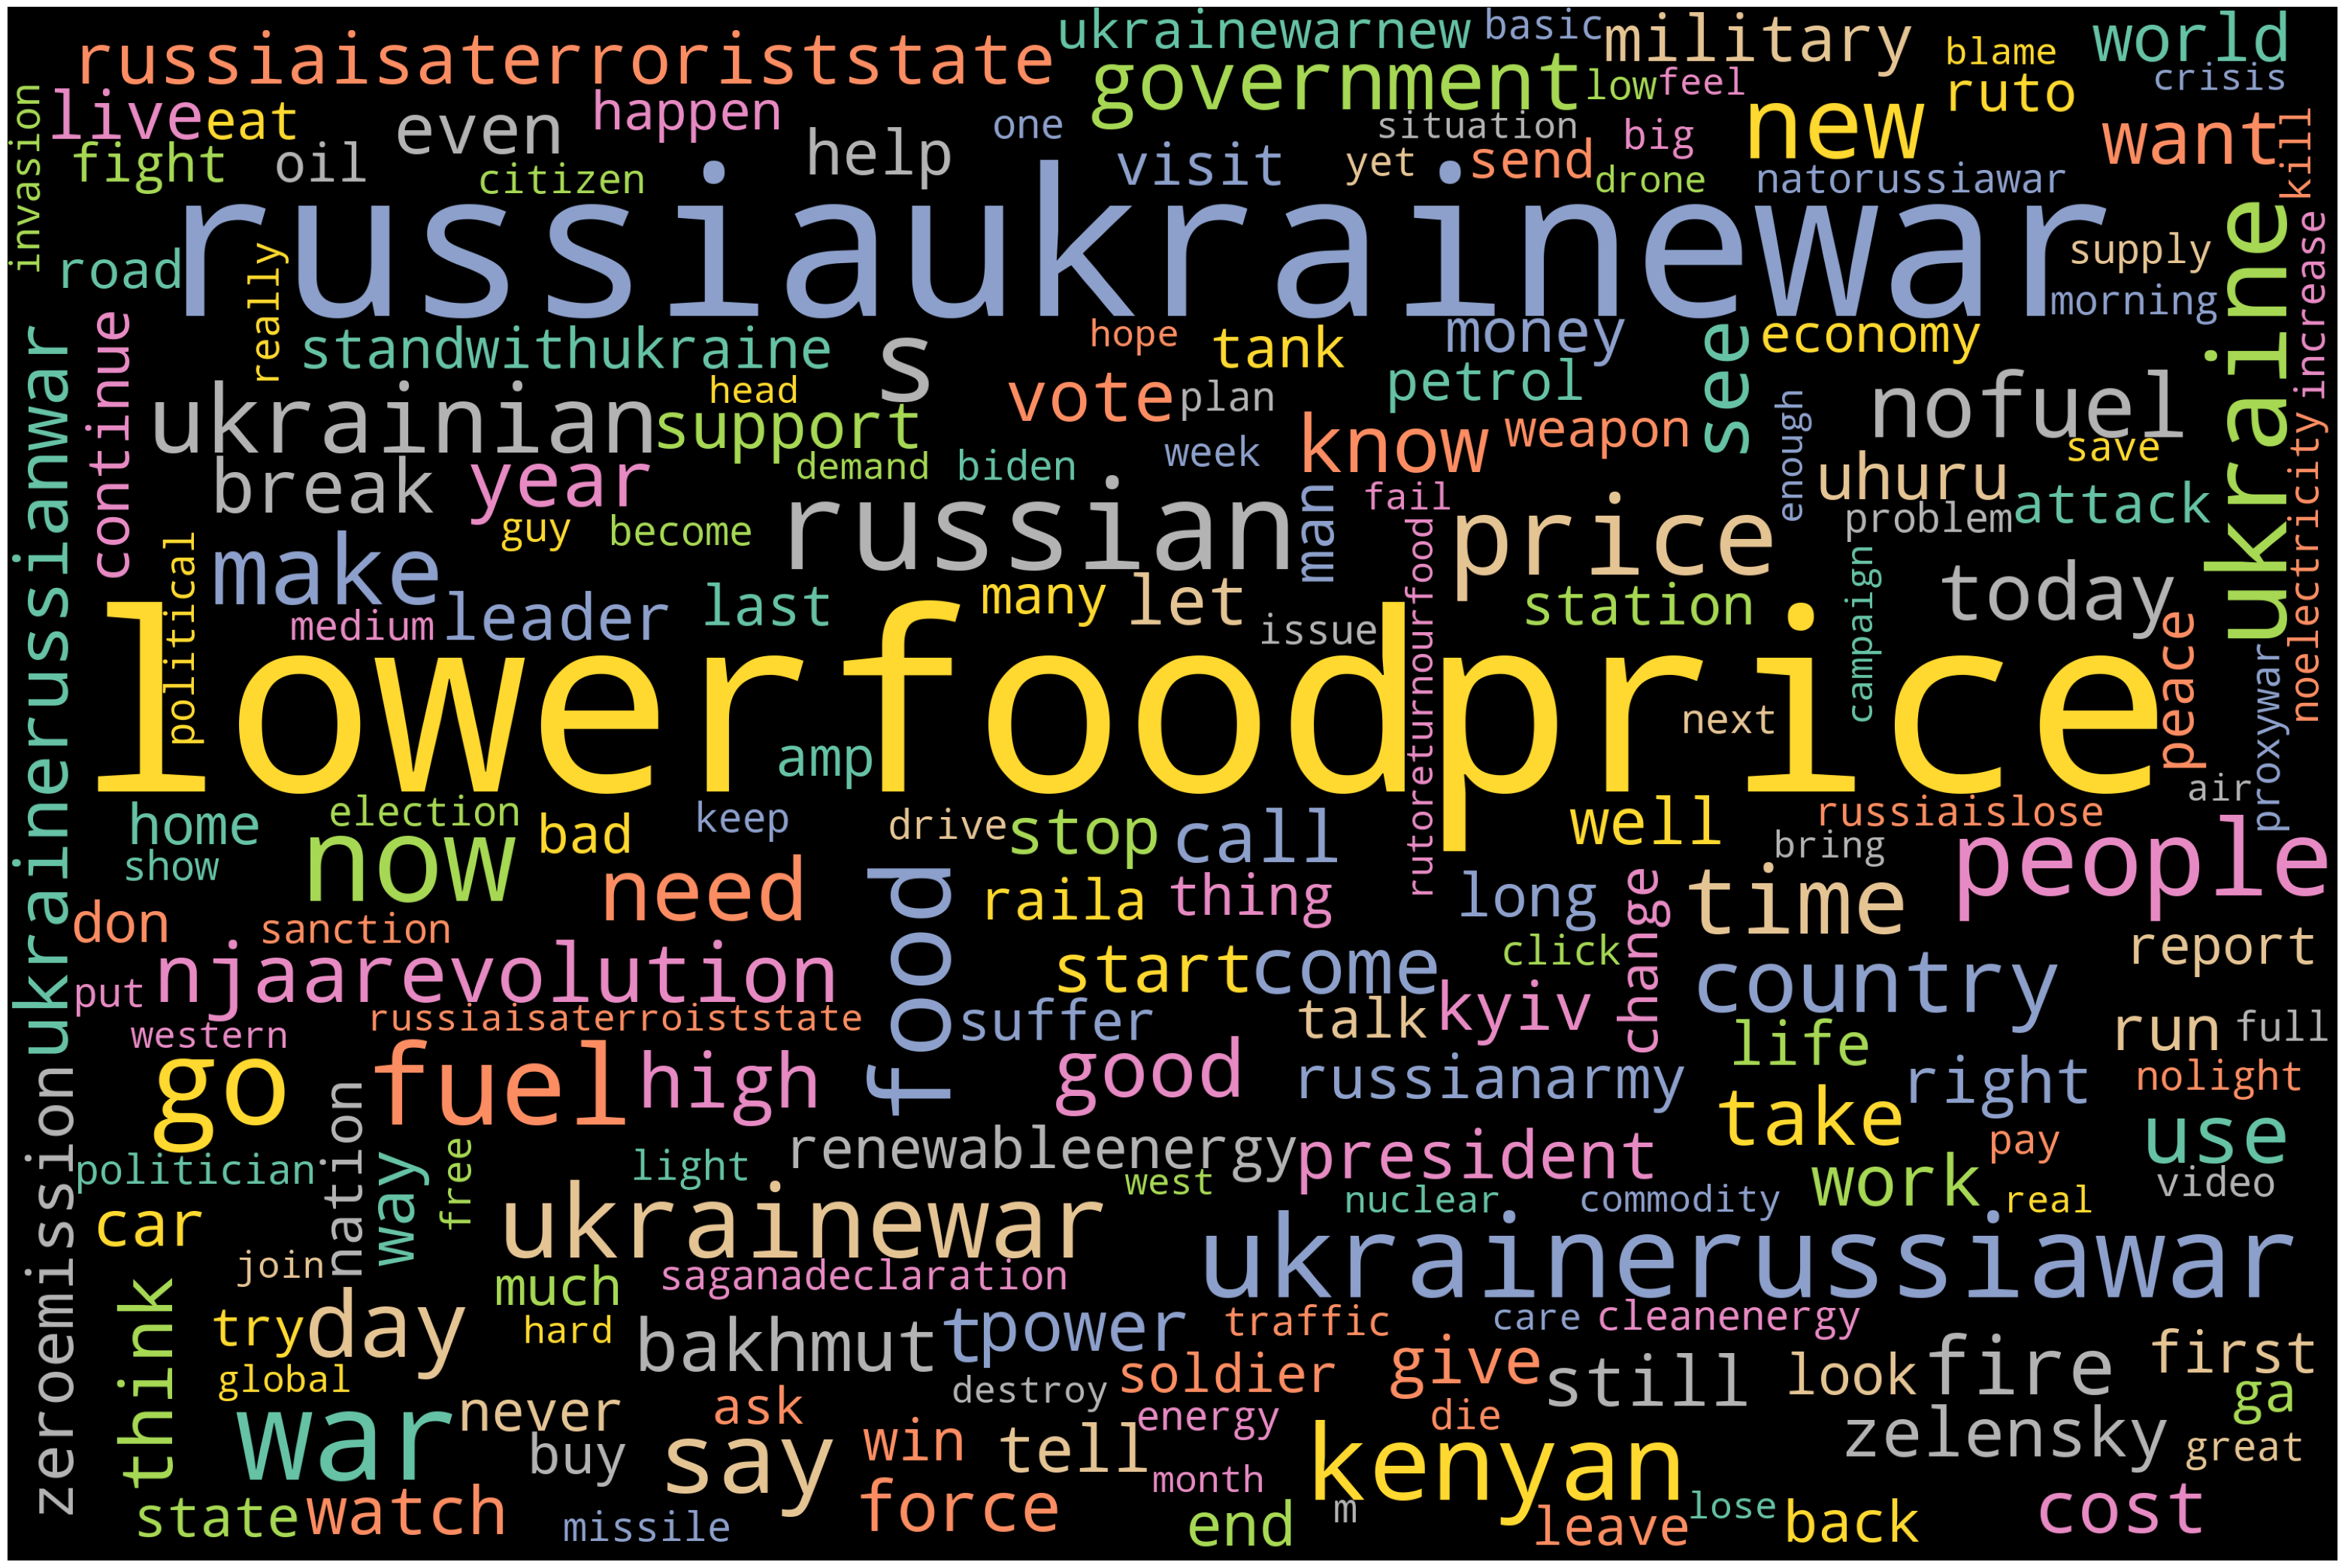

In [101]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *

# wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in ddf.Content)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

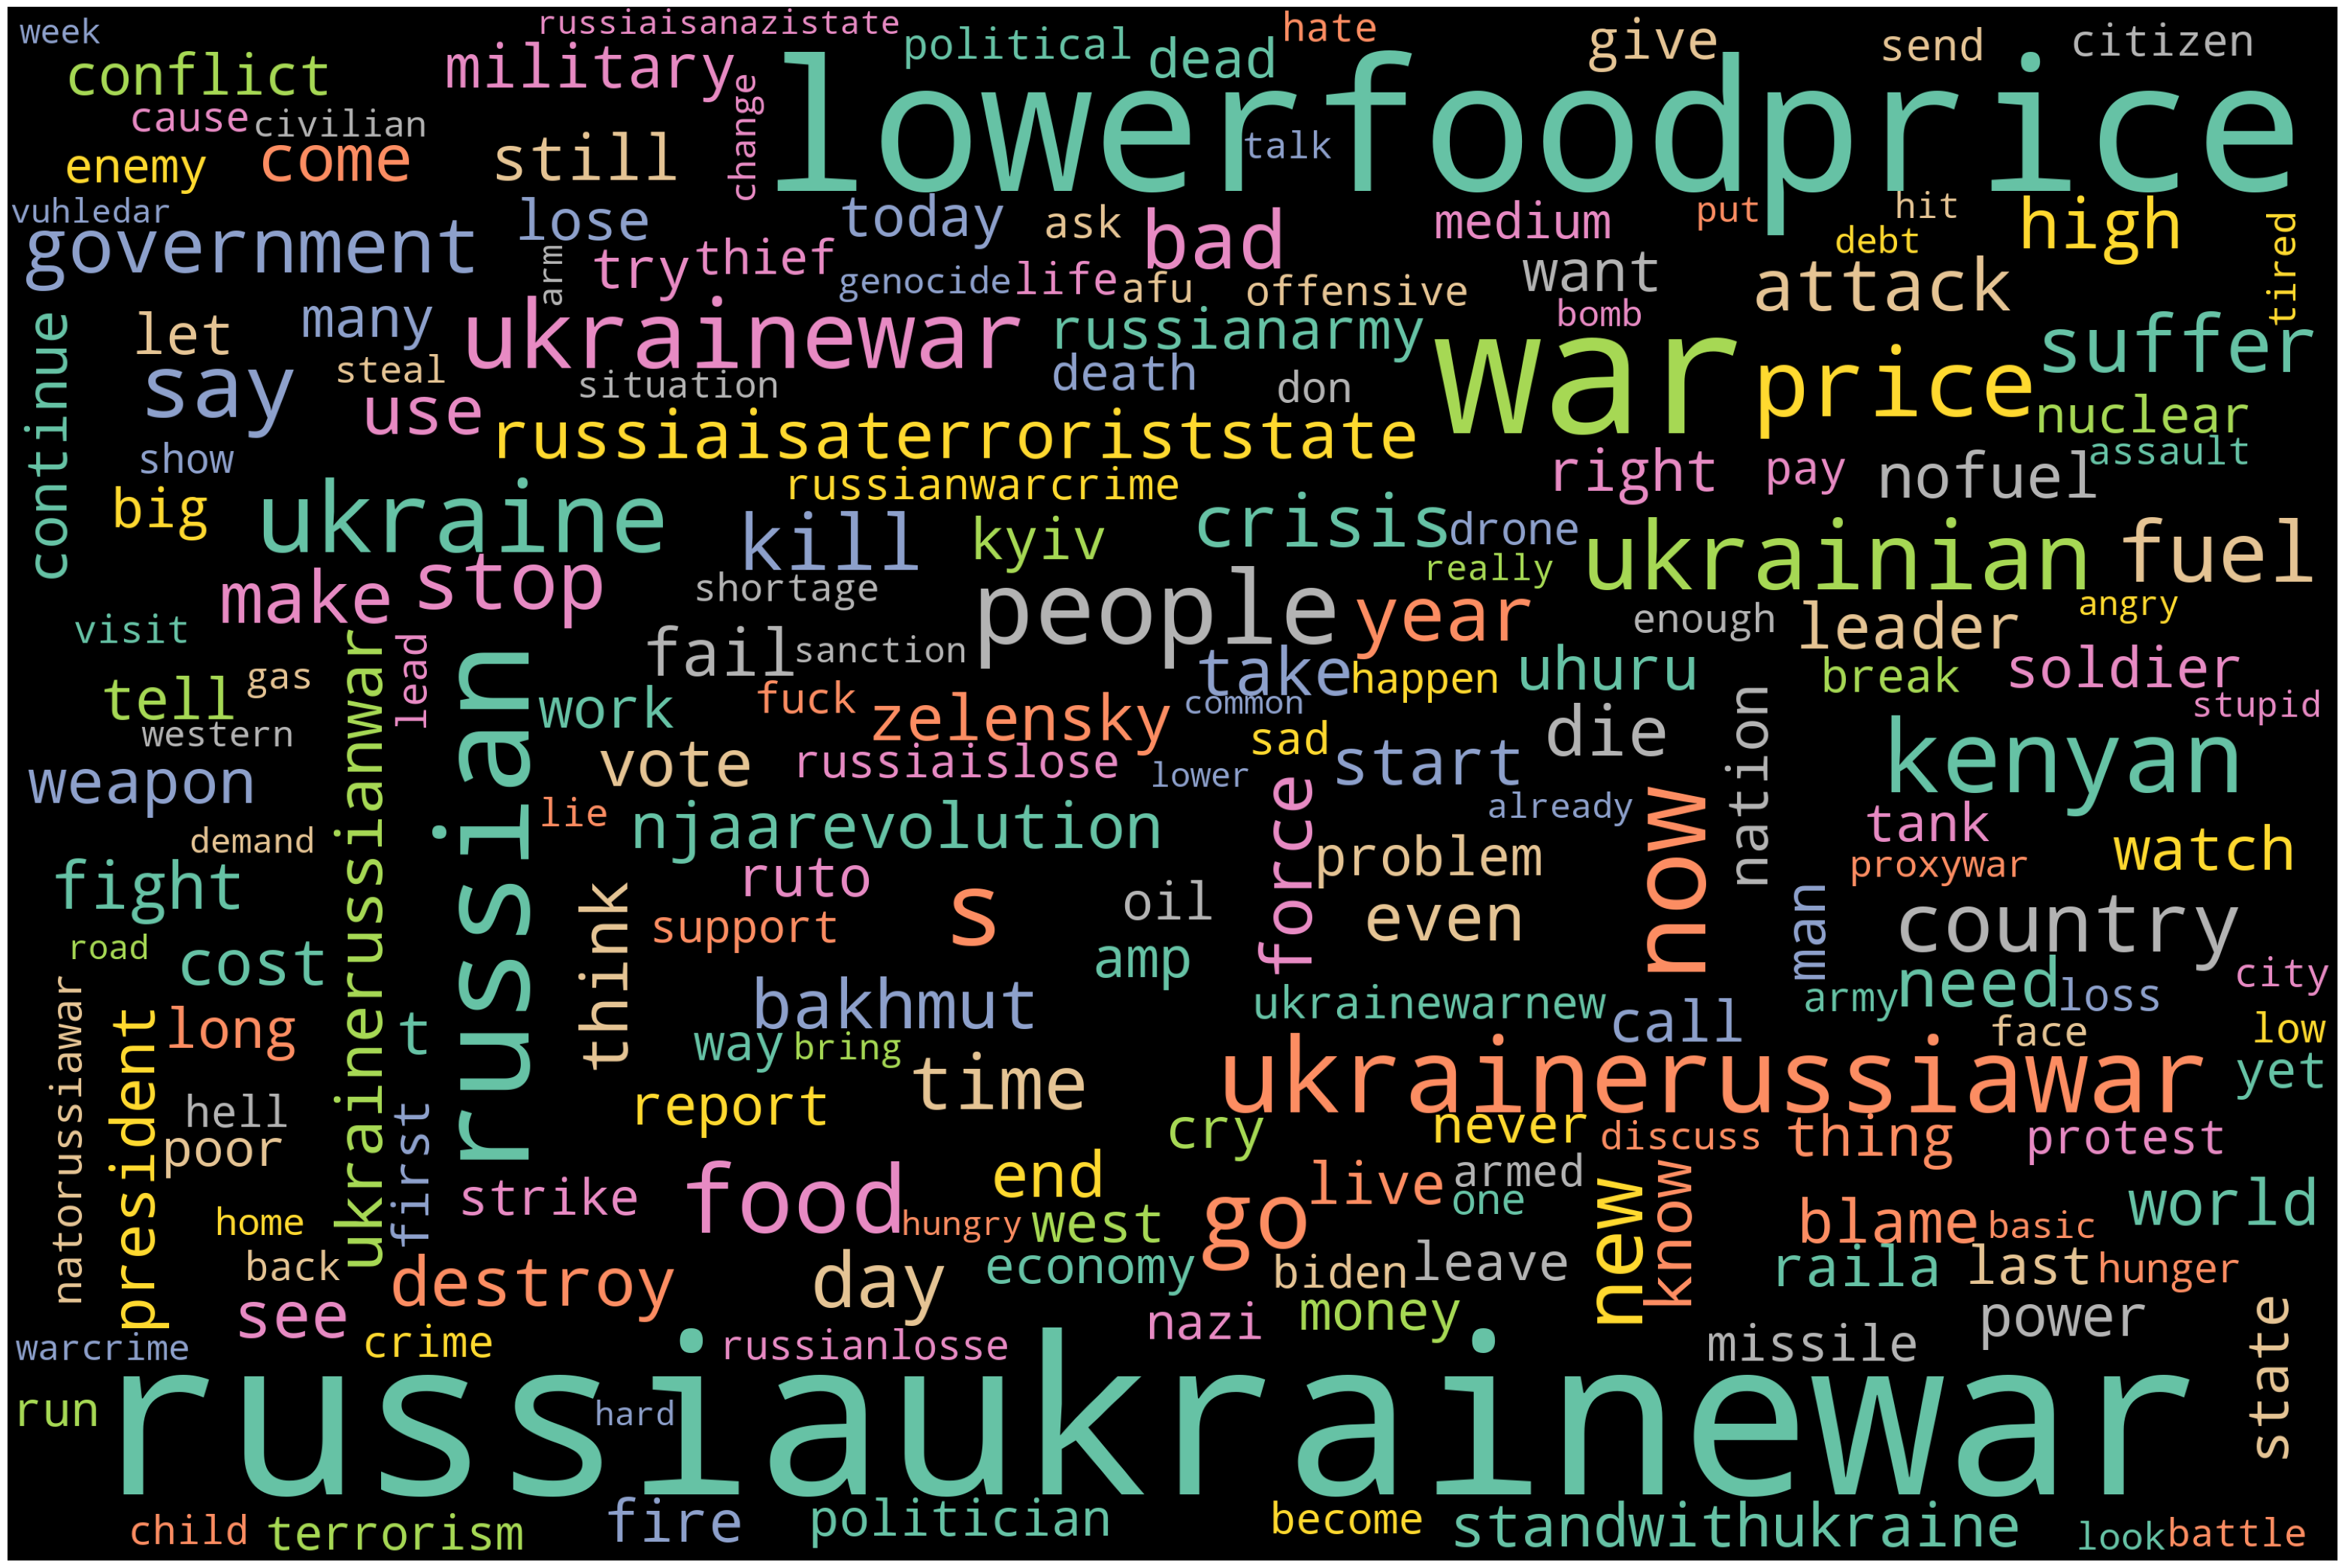

In [113]:
text = " ".join(review for review in ddf[ddf['Category']=='neg'].Content)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

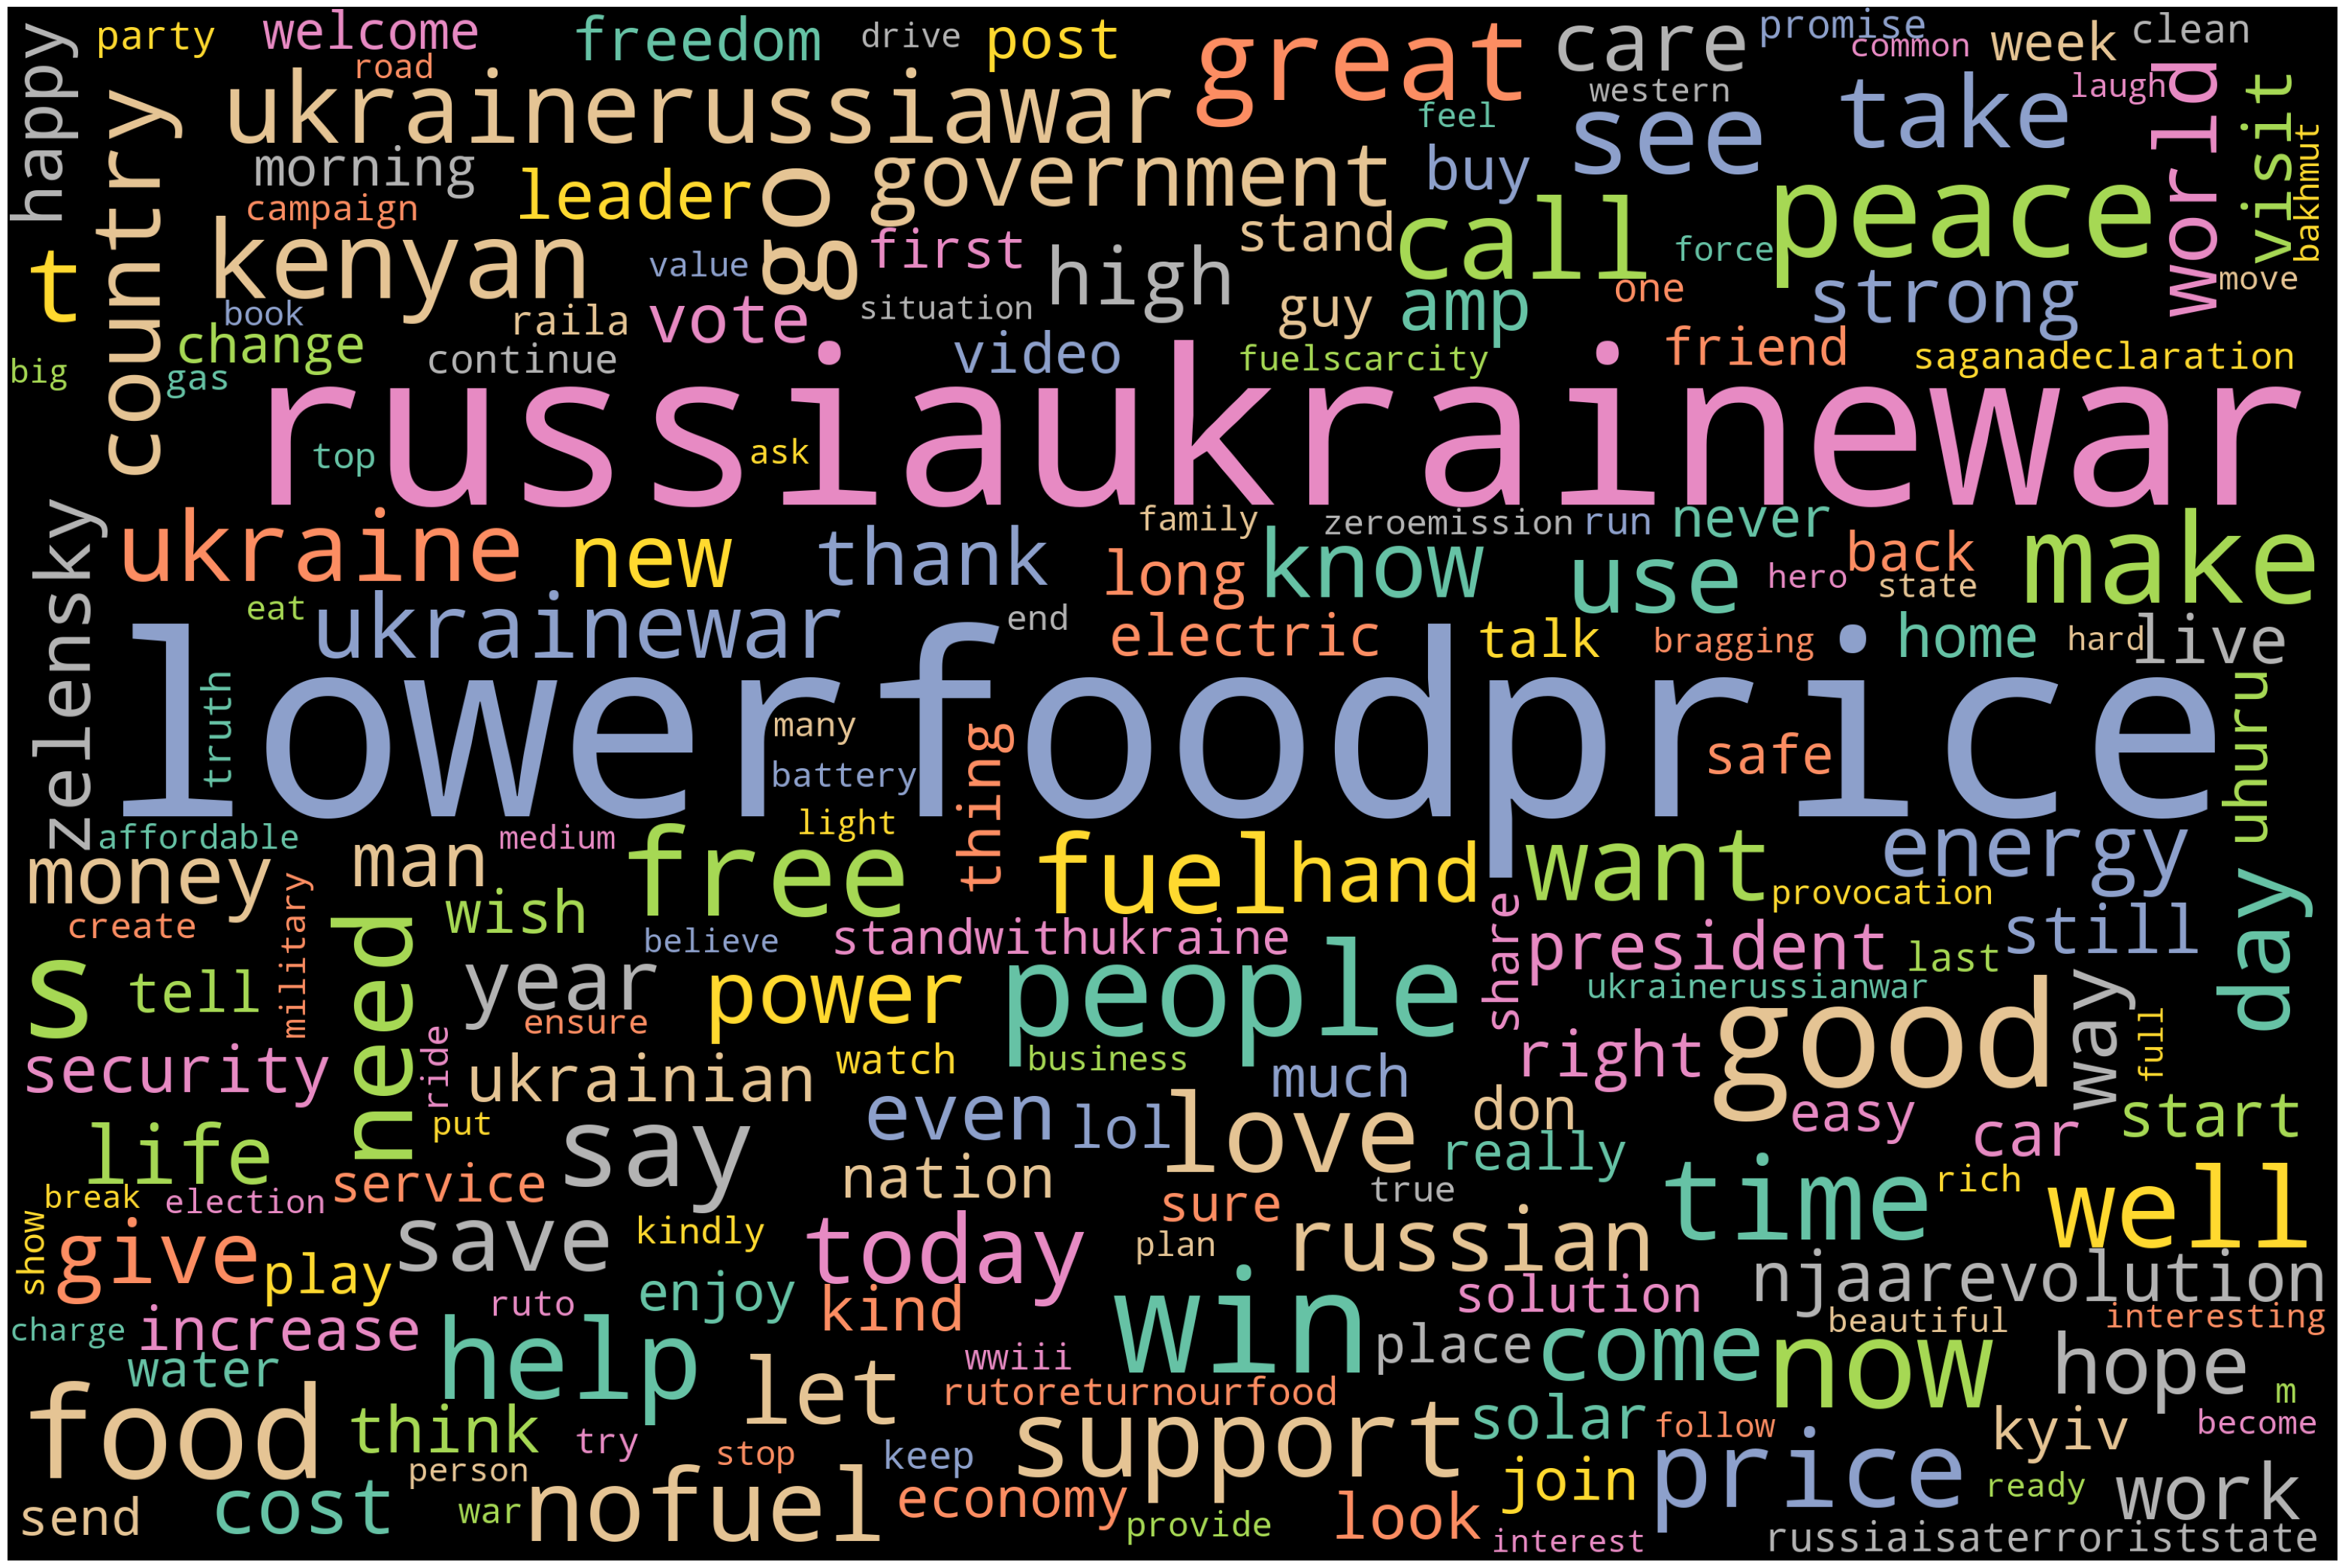

In [114]:
text = " ".join(review for review in ddf[ddf['Category']=='pos'].Content)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

In [119]:
ddf.head()

Date                        Source  \
1  2023-02-22           Twitter for Android   
3  2023-02-22               Twitter Web App   
4  2023-02-22            Twitter for iPhone   
5  2023-02-22           Twitter for Android   
8  2023-02-22  intellinews site integration   

                                             Content        Username  \
1  air raid siren active takeoff awac 50u 31ks be...          _Nex3_   
3  medium talk stand same sex marriage ban just w...  segunajayiemma   
4               settle war day trumpisalaughingstock       FalcDanny   
5  briefing security meeting chair insufficient s...  Mohammad445555   
8  budget deficit widen oil price fall military s...  bneintellinews   

          Location  Verified  Likes  Retweets language  text_len  \
1           Italia     False      0         0       en       182   
3    Lagos,Nigeria     False      1         0       en       188   
4              NaN     False      0         0       en       115   
5         Pakistan     False      0         0       en       276   
8  London - Europe     False      0         0       en       167   

   text_word_count  polarity  subjectivity sentiment    neg    neu    pos  \
1               25 -0.133333        0.6000  positive  0.000  0.787  0.213   
3               27  0.400000        0.2625  positive  0.196  0.598  0.207   
4               14  0.000000        0.0000  negative  0.565  0.435  0.000   
5               28  0.800000        0.9000  positive  0.000  0.536  0.464   
8               21 -0.100000        0.1000  negative  0.153  0.847  0.000   

   compound Category  
1    0.4019      neu  
3    0.0516      neu  
4   -0.5994      neg  
5    0.7783      pos  
8   -0.4019      neu

# Modelling

In [140]:
def clean(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

list.head()

Content  \
1  air raid siren active takeoff awac 50u 31ks be...   
3  medium talk stand same sex marriage ban just w...   
4               settle war day trumpisalaughingstock   
5  briefing security meeting chair insufficient s...   
8  budget deficit widen oil price fall military s...   

                                               punct  \
1  air raid siren active takeoff awac u ks belaru...   
3  medium talk stand same sex marriage ban just w...   
4               settle war day trumpisalaughingstock   
5  briefing security meeting chair insufficient s...   
8  budget deficit widen oil price fall military s...   

                                           tokenized  \
1  [air, raid, siren, active, takeoff, awac, u, k...   
3  [medium, talk, stand, same, sex, marriage, ban...   
4          [settle, war, day, trumpisalaughingstock]   
5  [briefing, security, meeting, chair, insuffici...   
8  [budget, deficit, widen, oil, price, fall, mil...   

                                             nonstop  \
1  [air, raid, siren, active, takeoff, awac, u, k...   
3  [medium, talk, stand, sex, marriage, ban, win,...   
4          [settle, war, day, trumpisalaughingstock]   
5  [briefing, security, meeting, chair, insuffici...   
8  [budget, deficit, widen, oil, price, fall, mil...   

                                             stemmed  
1  [air, raid, siren, activ, takeoff, awac, u, ks...  
3  [medium, talk, stand, sex, marriag, ban, win, ...  
4           [settl, war, day, trumpisalaughingstock]  
5  [brief, secur, meet, chair, insuffici, secur, ...  
8  [budget, deficit, widen, oil, price, fall, mil...

In [186]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel


In [193]:
# create a dictionary from the non-stopwords tokens
dictionary = corpora.Dictionary(list['nonstop'])

# create a corpus using the dictionary and the non-stopwords tokens
corpus = [dictionary.doc2bow(text) for text in list['nonstop']]

In [194]:
#instantiate the LDA model and fit it to the corpus
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=42,
    update_every=1,
    passes=10,
    alpha='auto',
    per_word_topics=True
)


In [195]:
# compute the coherence score for the model
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=list['nonstop'],
    dictionary=dictionary,
    coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()

# print the topics and the coherence score
print('\nTopics:')
pprint(lda_model.print_topics())
print('\nCoherence Score:', coherence_lda)


Topics:
[(0,
  '0.147*"lowerfoodprice" + 0.028*"go" + 0.018*"price" + 0.017*"people" + '
  '0.017*"day" + 0.015*"kenyan" + 0.014*"come" + 0.012*"time" + 0.012*"say" + '
  '0.012*"need"'),
 (1,
  '0.026*"food" + 0.021*"get" + 0.015*"country" + 0.012*"let" + 0.012*"cost" + '
  '0.012*"vote" + 0.011*"gas" + 0.011*"life" + 0.010*"stop" + 0.010*"live"'),
 (2,
  '0.043*"buy" + 0.032*"road" + 0.017*"check" + 0.014*"dead" + 0.013*"free" + '
  '0.012*"battery" + 0.011*"dog" + 0.011*"omo" + 0.010*"flight" + '
  '0.010*"join"'),
 (3,
  '0.036*"drive" + 0.027*"lmao" + 0.022*"th" + 0.022*"self" + 0.021*"tank" + '
  '0.019*"available" + 0.019*"r" + 0.016*"feel" + 0.015*"govt" + '
  '0.014*"basic"'),
 (4,
  '0.023*"sleep" + 0.016*"demand" + 0.013*"solution" + 0.012*"sit" + '
  '0.012*"dp" + 0.011*"corruption" + 0.011*"kind" + 0.011*"enjoy" + '
  '0.011*"story" + 0.010*"global"'),
 (5,
  '0.166*"break" + 0.164*"news" + 0.019*"electric" + 0.018*"ooooh" + '
  '0.010*"wish" + 0.009*"reminder" + 0.009*"p